<h1 align='center' style=color:Red;text-weight:800>
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
</h1>

In [1]:
# Librerías utilizadas en el documento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Carga de archivos

In [2]:
df_hom = pd.read_csv('datasets\df_homicidios.csv')
df_hom_vic = pd.read_csv('datasets\df_vic_hom.csv')

In [3]:
df_hom.head(3)

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4.0,AVENIDA,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,1,2016-01-02,1.0,GRAL PAZ,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7.0,AVENIDA,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO,AUTO


In [4]:
df_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             696 non-null    object 
 1   N_VICTIMAS     696 non-null    int64  
 2   FECHA          696 non-null    object 
 3   HH             695 non-null    float64
 4   TIPO_DE_CALLE  696 non-null    object 
 5   COMUNA         696 non-null    int64  
 6   XY (CABA)      682 non-null    object 
 7   pos x          684 non-null    float64
 8   pos y          684 non-null    float64
 9   VICTIMA        696 non-null    object 
 10  ACUSADO        696 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 59.9+ KB


Cambio de tipos de variables para mejor aprovechamiento de las librerias

In [5]:
# cambio a formato categórico
df_hom['HH'] = df_hom['HH'].astype('category')
df_hom['TIPO_DE_CALLE'] = df_hom['TIPO_DE_CALLE'].astype('category')
df_hom['COMUNA'] = df_hom['COMUNA'].astype('category')
df_hom['VICTIMA'] = df_hom['VICTIMA'].astype('category')
df_hom['ACUSADO'] = df_hom['ACUSADO'].astype('category')

# Fecha
df_hom['FECHA'] = df_hom['FECHA'].astype('datetime64[ns]')


# cambio a float los valores de latitud y longitud
df_hom['pos x'] = df_hom['pos x'].astype('float')
df_hom['pos y'] = df_hom['pos y'].astype('float')

df_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             696 non-null    object        
 1   N_VICTIMAS     696 non-null    int64         
 2   FECHA          696 non-null    datetime64[ns]
 3   HH             695 non-null    category      
 4   TIPO_DE_CALLE  696 non-null    category      
 5   COMUNA         696 non-null    category      
 6   XY (CABA)      682 non-null    object        
 7   pos x          684 non-null    float64       
 8   pos y          684 non-null    float64       
 9   VICTIMA        696 non-null    category      
 10  ACUSADO        696 non-null    category      
dtypes: category(5), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 38.5+ KB


In [6]:
# df_hom_vic['Rango_etario ']
df_hom_vic.columns

Index(['ID_hecho', 'FECHA', 'ROL', 'VICTIMA', 'SEXO', 'Rango_etario '], dtype='object')

Plot de variable categoricas

C:\Users\octav\AppData\Local\Temp\ipykernel_7140\3310591368.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[10, 10, -5, 0.8])


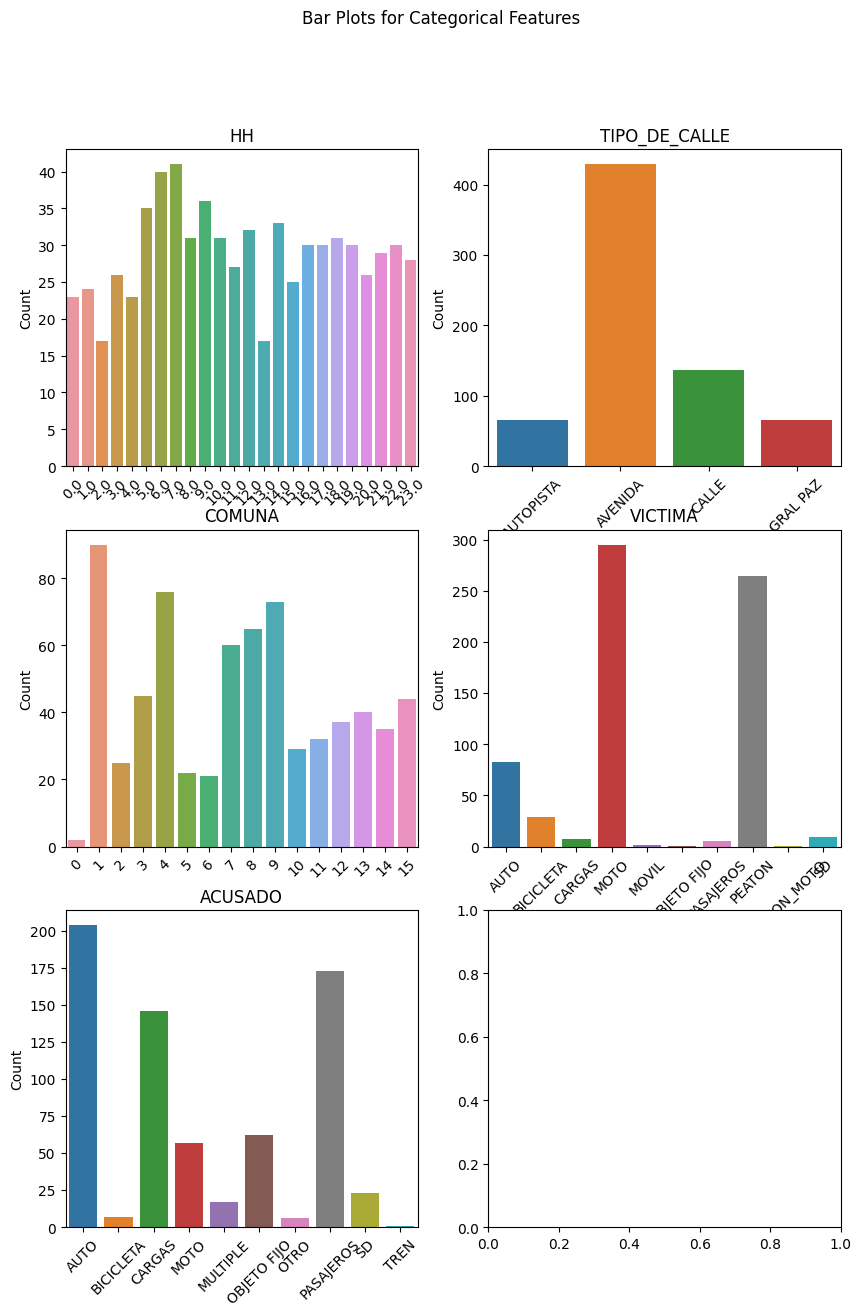

In [7]:
columnas_hom_categoricas = ["HH","TIPO_DE_CALLE","COMUNA","VICTIMA","ACUSADO",]

def plot_bar_plots(df,columnas):
    fig, axes = plt.subplots(3, 2, figsize=(10, 14))
    fig.suptitle('Bar Plots for Categorical Features')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[10, 10, -5, 0.8])

# Plotting the bar plots
plot_bar_plots(df_hom,columnas_hom_categoricas)
plt.show()

In [8]:
df_hom_vic['Rango_etario '].unique()

array(['2_ 18 a 29 años', '6_ 60 años o mas', '3_ 30 a 39 años',
       '1_ 0 a 17 años', '5_ 50 a 59 años', '4_ 45 a 49 años', nan],
      dtype=object)

In [11]:
# cambio a formato categórico
df_hom_vic['ID_hecho'] = df_hom_vic['ID_hecho'].astype('category')
df_hom_vic['ROL'] = df_hom_vic['ROL'].astype('category')
df_hom_vic['VICTIMA'] = df_hom_vic['VICTIMA'].astype('category')
df_hom_vic['SEXO'] = df_hom_vic['SEXO'].astype('category')
df_hom_vic['Rango_etario '] = df_hom_vic['Rango_etario '].astype('category')

C:\Users\octav\AppData\Local\Temp\ipykernel_7140\476882052.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[10, 10, -5, 2])


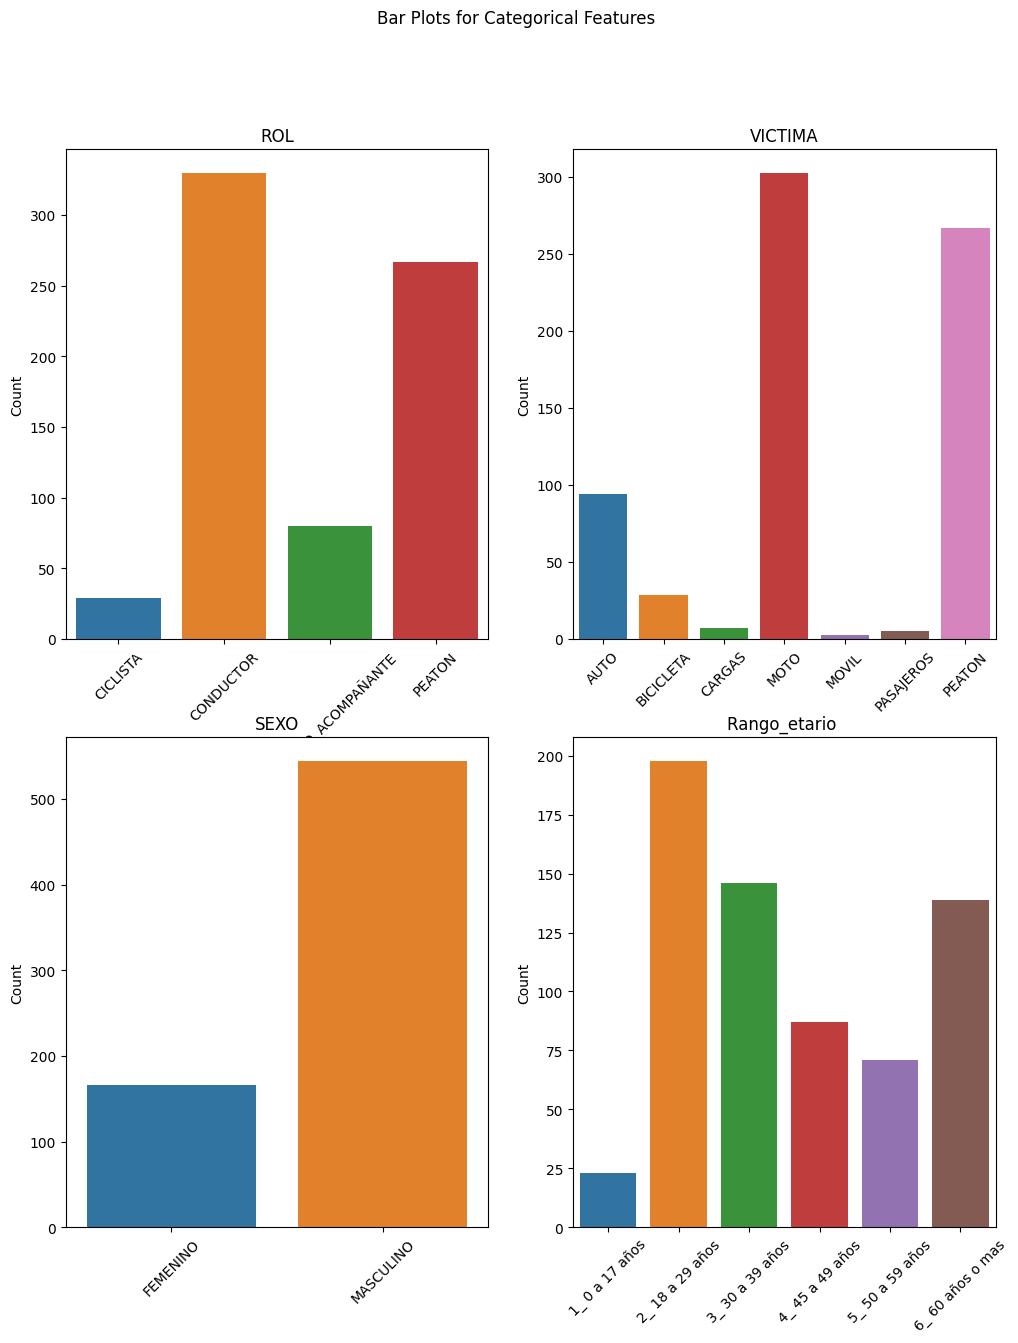

In [13]:
columnas_vic_categoricas = ["ROL","VICTIMA","SEXO","Rango_etario "]

def plot_bar_plots2(df,columnas):
    fig, axes = plt.subplots(2, 2, figsize=(12,14))
    fig.suptitle('Bar Plots for Categorical Features')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[10, 10, -5, 2])

# Plotting the bar plots
plot_bar_plots2(df_hom_vic,columnas_vic_categoricas)
plt.show()